## Imports

In [27]:
import pandas as pd
import sys

sys.path.insert(0,'../src')

from postprocess import *

## Interaction data processing

In [28]:
# For SATORI based interactions
df = pd.read_csv('../results/Arabidopsis_GenomeWide_Analysis_euclidean_v8_fixed/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt', sep='\t')
##df = pd.read_csv('../../Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_Results_v9_run2_5000/interactions_summary_attnLimit-0.12.txt', sep='\t')

# For FIS based interactions
#df = pd.read_csv('../results/Arabidopsis_GenomeWide_Analysis_euclidean_v8_fixed/Interactions_FIS/interactions_summary_attnLimit-10.0.txt', sep='\t')
##df = pd.read_csv('../../DFIM_Arabidopsis_experiment_v10/Interactions/interactions_summary_attnLimit-0.txt', sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [29]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [30]:
df.shape

(3909, 12)

In [31]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter1<-->filter3,200,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.031988,36.0,42.0,2210.0,2391.0,4.775539e-112,4.610205e-111
1,filter1<-->filter10,207,MYB_tnt.MYB51_col_a_m1,0.003637,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.007115,90.0,36.0,3031.0,3746.0,8.689740e-66,2.099953e-65
2,filter1<-->filter11,208,MYB_tnt.MYB51_col_a_m1,0.003637,MYB_tnt.MYB51_col_a_m1,0.007254,180.0,348.0,2100.0,2536.0,2.938162e-73,8.756532e-73
3,filter1<-->filter12,209,MYB_tnt.MYB51_col_a_m1,0.003637,G2like_tnt.AT2G40260_colamp_a_m1,0.000189,102.0,300.0,2504.0,2330.0,1.226026e-153,4.591060e-152
4,filter1<-->filter13,210,MYB_tnt.MYB51_col_a_m1,0.003637,TCP_tnt.TCP20_col_a_m1,0.004183,84.0,282.0,1021.0,931.0,2.010799e-39,2.654508e-39


### Annotate the interacting motifs

In [32]:
df['TF1'] = df['motif1'].apply(lambda x: x.split('_')[1].strip('.tnt'))
df['TF2'] = df['motif2'].apply(lambda x: x.split('_')[1].strip('.tnt'))

In [33]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
0,filter1<-->filter3,200,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.031988,36.0,42.0,2210.0,2391.0,4.775539e-112,4.610205e-111,MYB51,WRKY31
1,filter1<-->filter10,207,MYB_tnt.MYB51_col_a_m1,0.003637,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.007115,90.0,36.0,3031.0,3746.0,8.689740e-66,2.099953e-65,MYB51,AT1G69570
2,filter1<-->filter11,208,MYB_tnt.MYB51_col_a_m1,0.003637,MYB_tnt.MYB51_col_a_m1,0.007254,180.0,348.0,2100.0,2536.0,2.938162e-73,8.756532e-73,MYB51,MYB51
3,filter1<-->filter12,209,MYB_tnt.MYB51_col_a_m1,0.003637,G2like_tnt.AT2G40260_colamp_a_m1,0.000189,102.0,300.0,2504.0,2330.0,1.226026e-153,4.591060e-152,MYB51,AT2G40260
4,filter1<-->filter13,210,MYB_tnt.MYB51_col_a_m1,0.003637,TCP_tnt.TCP20_col_a_m1,0.004183,84.0,282.0,1021.0,931.0,2.010799e-39,2.654508e-39,MYB51,TCP20


In [34]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [35]:
df = df[df['TF1']!=df['TF2']]

In [36]:
df.shape

(3667, 15)

In [37]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [38]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [39]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter1<-->filter3,200,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.031988,36.0,42.0,2210.0,2391.0,4.775539e-112,4.610205e-111,MYB51,WRKY31,MYB51$\longleftrightarrow$WRKY31
1,filter1<-->filter10,207,MYB_tnt.MYB51_col_a_m1,0.003637,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.007115,90.0,36.0,3031.0,3746.0,8.689740e-66,2.099953e-65,MYB51,AT1G69570,MYB51$\longleftrightarrow$AT1G69570
2,filter1<-->filter12,209,MYB_tnt.MYB51_col_a_m1,0.003637,G2like_tnt.AT2G40260_colamp_a_m1,0.000189,102.0,300.0,2504.0,2330.0,1.226026e-153,4.591060e-152,MYB51,AT2G40260,MYB51$\longleftrightarrow$AT2G40260
3,filter1<-->filter13,210,MYB_tnt.MYB51_col_a_m1,0.003637,TCP_tnt.TCP20_col_a_m1,0.004183,84.0,282.0,1021.0,931.0,2.010799e-39,2.654508e-39,MYB51,TCP20,MYB51$\longleftrightarrow$TCP20
4,filter1<-->filter14,211,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.009697,204.0,24.0,1418.0,1539.0,1.441883e-72,4.209351e-72,MYB51,WRKY31,MYB51$\longleftrightarrow$WRKY31


In [40]:
df.shape

(3667, 15)

## Most Frequent TF Family Interactions

In [41]:
df['TF1_Family'] = df['motif1'].apply(lambda x: x.split('_')[0])
df['TF2_Family'] = df['motif2'].apply(lambda x: x.split('_')[0])

In [42]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [43]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [44]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter1<-->filter3,200,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.031988,36.0,42.0,2210.0,2391.0,4.775539e-112,4.610205e-111,MYB51,WRKY31,MYB51$\longleftrightarrow$WRKY31,MYB,WRKY,MYB$\longleftrightarrow$WRKY
1,filter1<-->filter10,207,MYB_tnt.MYB51_col_a_m1,0.003637,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.007115,90.0,36.0,3031.0,3746.0,8.689740e-66,2.099953e-65,MYB51,AT1G69570,MYB51$\longleftrightarrow$AT1G69570,MYB,C2C2dof,MYB$\longleftrightarrow$C2C2dof
2,filter1<-->filter12,209,MYB_tnt.MYB51_col_a_m1,0.003637,G2like_tnt.AT2G40260_colamp_a_m1,0.000189,102.0,300.0,2504.0,2330.0,1.226026e-153,4.591060e-152,MYB51,AT2G40260,MYB51$\longleftrightarrow$AT2G40260,MYB,G2like,MYB$\longleftrightarrow$G2like
3,filter1<-->filter13,210,MYB_tnt.MYB51_col_a_m1,0.003637,TCP_tnt.TCP20_col_a_m1,0.004183,84.0,282.0,1021.0,931.0,2.010799e-39,2.654508e-39,MYB51,TCP20,MYB51$\longleftrightarrow$TCP20,MYB,TCP,MYB$\longleftrightarrow$TCP
4,filter1<-->filter14,211,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.009697,204.0,24.0,1418.0,1539.0,1.441883e-72,4.209351e-72,MYB51,WRKY31,MYB51$\longleftrightarrow$WRKY31,MYB,WRKY,MYB$\longleftrightarrow$WRKY


In [45]:
df['filter_interaction'] = df['filter_interaction'].apply(lambda x: x.replace('<-->',r'$\longleftrightarrow$'))

In [46]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter1$\longleftrightarrow$filter3,200,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.031988,36.0,42.0,2210.0,2391.0,4.775539e-112,4.610205e-111,MYB51,WRKY31,MYB51$\longleftrightarrow$WRKY31,MYB,WRKY,MYB$\longleftrightarrow$WRKY
1,filter1$\longleftrightarrow$filter10,207,MYB_tnt.MYB51_col_a_m1,0.003637,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.007115,90.0,36.0,3031.0,3746.0,8.689740e-66,2.099953e-65,MYB51,AT1G69570,MYB51$\longleftrightarrow$AT1G69570,MYB,C2C2dof,MYB$\longleftrightarrow$C2C2dof
2,filter1$\longleftrightarrow$filter12,209,MYB_tnt.MYB51_col_a_m1,0.003637,G2like_tnt.AT2G40260_colamp_a_m1,0.000189,102.0,300.0,2504.0,2330.0,1.226026e-153,4.591060e-152,MYB51,AT2G40260,MYB51$\longleftrightarrow$AT2G40260,MYB,G2like,MYB$\longleftrightarrow$G2like
3,filter1$\longleftrightarrow$filter13,210,MYB_tnt.MYB51_col_a_m1,0.003637,TCP_tnt.TCP20_col_a_m1,0.004183,84.0,282.0,1021.0,931.0,2.010799e-39,2.654508e-39,MYB51,TCP20,MYB51$\longleftrightarrow$TCP20,MYB,TCP,MYB$\longleftrightarrow$TCP
4,filter1$\longleftrightarrow$filter14,211,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.009697,204.0,24.0,1418.0,1539.0,1.441883e-72,4.209351e-72,MYB51,WRKY31,MYB51$\longleftrightarrow$WRKY31,MYB,WRKY,MYB$\longleftrightarrow$WRKY


In [47]:
df.shape

(3667, 18)

In [48]:
df.to_csv('output/Arabidopsis_interactions.csv')

### Distribution of individual TF or TF family interactions

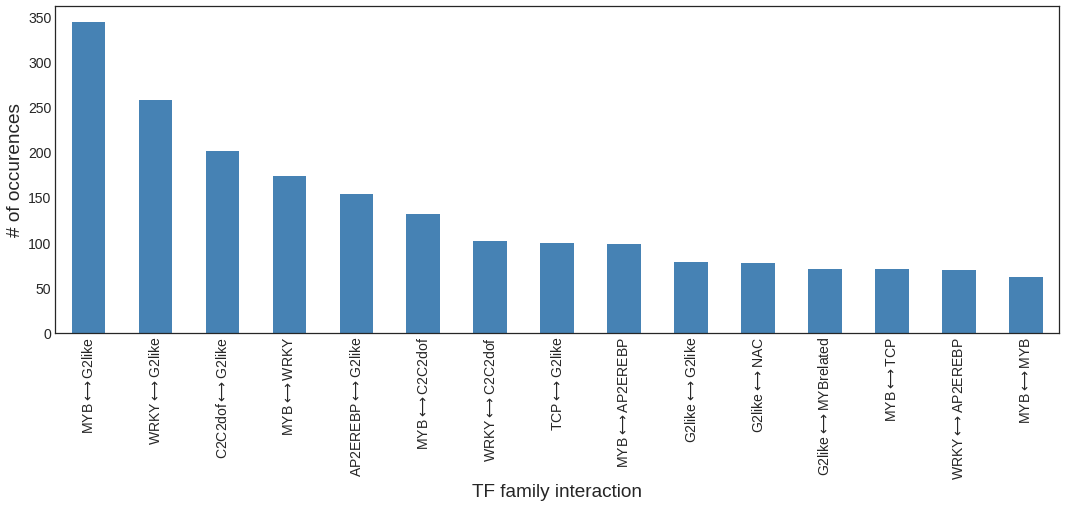

In [49]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15)

### Plot interaction distance distribution

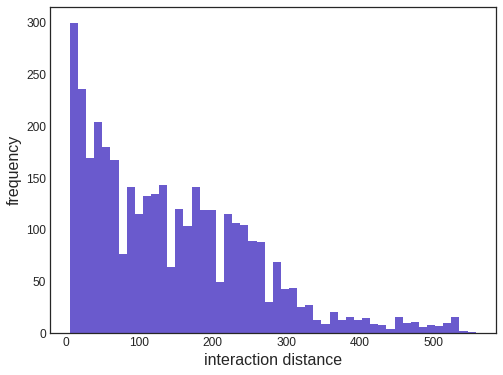

In [50]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

In [51]:
df['mean_distance'].mean(), df['mean_distance'].median()

(145.37114807744751, 126.0)

### Most frequent interactions and their respective interaction distances

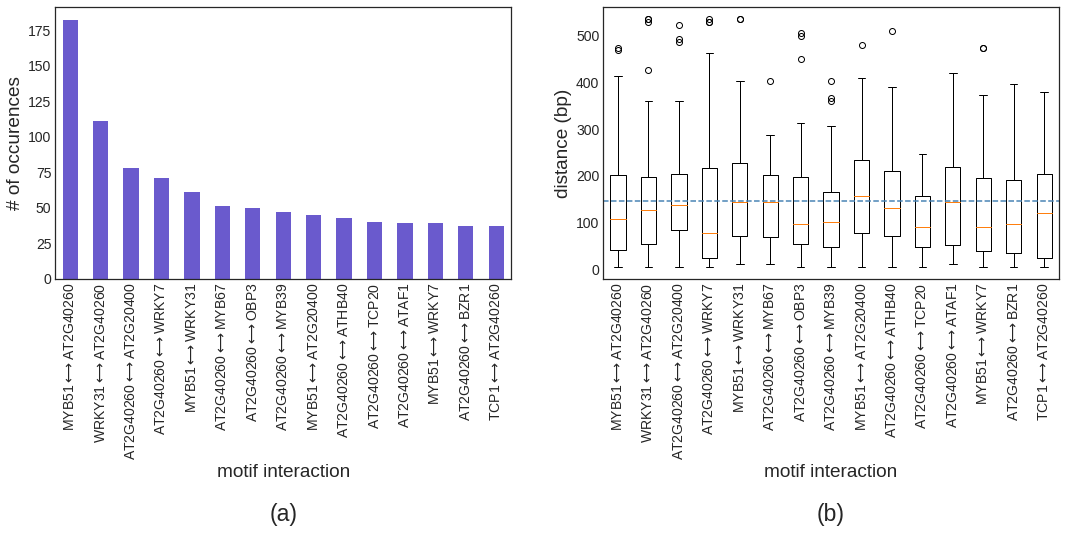

In [52]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_mean_dist=True, dist_color='slateblue', cap_pos=[0.5, -0.89], store_pdf_path='output/arabidopsis_main_distance_boxplot.pdf')

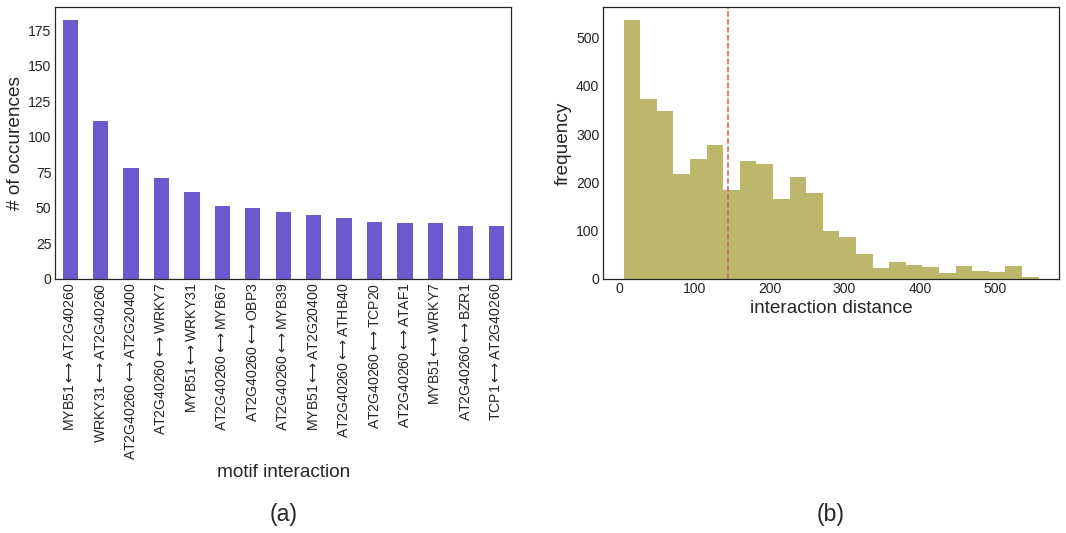

In [53]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_mean_dist=True, dist_colors=['slateblue', 'darkkhaki'], cap_pos=[0.5, -0.89], store_pdf_path='output/arabidopsis_main_distance_histogram.pdf')